## Problem Statement

Flight Ticket Prices are so unpredictable, for example you want to travel goa tomorrow afternoon through flight if you check the flight price today and check the flight price tomorrow morning , then you observe lot of difference in cost. This is so fascinating , as a data enthusiast I want to crack this problem using Machine Learning.


Aim : Taking previous ticket price data of flight, we need to predict the fucture flight ticket price of same flight


Problem statement belong to Regression Problem statement

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This problem statement taken from hackathon 

They have given train and test data set in excel format 

This is hackathon problem our aim is to get good metirc value 

We can combine both tranin and test data set and applying feature engineering and feature selection

After feature selection we split the combine data into train and test data set 

But there is chance for Data leakage

Combine them we can't create a Generalized model


In [105]:
# Reading excel file 

train_data_set=pd.read_csv('Train.csv')

In [106]:
train_data_set

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [107]:
train_data_set.shape

(10683, 11)

Dataframe have 10683 data points and 11 features

We have 10 independent features

1 dependent feature

Independent features :

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Dependent Feature :

Price: The price of the ticket

In [108]:
# Features information 

train_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Our independent features are all object data types

Our dependent feaature is float data type

We need to convert the all independent features data type from object data type to numerical data type

In [109]:
# Null values in data set

train_data_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [110]:
# Dropping null values
train_data_set.dropna(inplace=True)

In [111]:

train_data_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Now we need to convert the independent features data type from object to int

# Feature Engineerig

Feature 1 : Date_of_Journey 

In [112]:
# Now we take one by one features and conevert them object data type to int data type

# First Data_of_Journey feature 

# We use pandas to_datetime to convert object data type

# For date extraction dt.day
train_data_set["Journey_Date"] = pd.to_datetime(train_data_set.Date_of_Journey, format="%d/%m/%Y").dt.day

# For month extraction dt.month
train_data_set["Journey_Month"] = pd.to_datetime(train_data_set.Date_of_Journey, format="%d/%m/%Y").dt.month

In [113]:
train_data_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


We have same year over the dataframe so year not that much useful 

We extract the data and month from Date_of_Journey there is no need of that feature any more 

Now we drop the Date_of_journey feature?

In [114]:
# Dropping Date_of_journey

train_data_set.drop(["Date_of_Journey"], axis = 1, inplace = True)

Feature 2: Dep_time

In [115]:
# Extracing hours and min from Dep_time feature 

# Extracting Hours
train_data_set["Dep_hour"] = pd.to_datetime(train_data_set["Dep_Time"]).dt.hour

# Extracting Minutes
train_data_set["Dep_min"] = pd.to_datetime(train_data_set["Dep_Time"]).dt.minute


In [116]:
train_data_set.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


We extract the hours and min from Dep_time 

So there is no need of Dep_time feature 

We can drop it

In [117]:
#Droping Dep_Time 

train_data_set.drop(["Dep_Time"], axis = 1, inplace = True)

Feature 3 : Arrival_Time

In [118]:
# We need to extract hours and min from Arrival_Time

# Extracting Hours
train_data_set["Arrival_Hour"] = pd.to_datetime(train_data_set.Arrival_Time).dt.hour

# Extracting Minutes
train_data_set["Arrival_Min"] = pd.to_datetime(train_data_set.Arrival_Time).dt.minute


In [119]:
train_data_set.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


We extracted our information from Arrival_Time we can drop that feature

In [120]:

# Droping Arrival_Time

train_data_set.drop(["Arrival_Time"], axis = 1, inplace = True)


Feature 4 : Duration

In [121]:
# In Duration feature we have 2h 50m type we need remove h and m and extract hours and min from Duration feature

duration = list(train_data_set["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [122]:

# Adding duration_hours and duration_mins list to train_data dataframe

train_data_set["Duration_Hours"] = duration_hours
train_data_set["Duration_Mins"] = duration_mins

In [123]:
train_data_set.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


We extract the Hours and min from Duration feature now we can drop it


In [124]:
# Droping Duration feature
train_data_set.drop(["Duration"], axis = 1, inplace = True)

Feature 5 : Airline 

In [125]:
# Airline feature is categorical feature 

# It is Nominal feature ====> We can't compare one category with another category 

# We encode this Nominal features with One Hot encoding 


train_data_set["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Using one hot encoding we convert this nominal features into int data type 

In [126]:
# converting nominal features with one hot encoding 

Airline = train_data_set[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


Feature 6: Source

In [127]:
# Source also nominal feature 

# We encode it with one hot encoding 


train_data_set["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [128]:
# Encoding Source nomial feature with one hot encoding 

Source = train_data_set[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


Feature 7 : Destination 

In [129]:
# Destination also nominal feature 

# We use one hot encoding 

train_data_set["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [130]:
# One hot encoding for Destination 

Destination = train_data_set[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()



,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [131]:
train_data_set['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

Additional_Info feature have nearly 83% of No info  so does not useful much

Route is nothing but no of halts 

Route is directly proportional to the  Total_Stops 

We can drop Route feature because Total_Stops and Rotue doing same thing 

We can drop one of them 

I choose to drop Route 

So Additional_Info and Route are not useful so we can drop them 

In [132]:
# Droping Additional_Info an Route features 

train_data_set.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

Feature 8 : Total_Stops

In [133]:
# Total_Stops is Ordinal feature 

# We use Labelencoding to encode it 

train_data_set["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [134]:
# Lable encoding 
train_data_set.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [135]:
train_data_set

,Airline,Source,Destination,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


Now we can Drop nominal features Airline,Source,Destination 

And We append the encoded features to dataframe

In [136]:
# Droping nominal features 

train_data_set.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [137]:
train_data_set

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30
10679,0,4145,27,4,20,45,23,20,2,35
10680,0,7229,27,4,8,20,11,20,3,0
10681,0,12648,1,3,11,30,14,10,2,40


In [138]:
# Appending encoded features to data frame 

Processed_train_data_set = pd.concat([train_data_set, Airline, Source, Destination], axis = 1)

In [139]:
Processed_train_data_set

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


## EDA

In [140]:
# Statistical information 

Processed_train_data_set.describe()

,Total_Stops,Price,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,...,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,13.509081,4.708575,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624,...,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250
std,0.675229,4611.548810,8.479363,1.164408,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817,...,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
# Correlation 

Processed_train_data_set.corr

<bound method DataFrame.corr of        Total_Stops  Price  Journey_Date  Journey_Month  Dep_hour  Dep_min  \
0                0   3897            24              3        22       20   
1                2   7662             1              5         5       50   
2                2  13882             9              6         9       25   
3                1   6218            12              5        18        5   
4                1  13302             1              3        16       50   
...            ...    ...           ...            ...       ...      ...   
10678            0   4107             9              4        19       55   
10679            0   4145            27              4        20       45   
10680            0   7229            27              4         8       20   
10681            0  12648             1              3        11       30   
10682            2  11753             9              5        10       55   

       Arrival_Hour  Arrival_Min  Duration_

In [142]:
relation =Processed_train_data_set.corr()
relation_index=relation.index

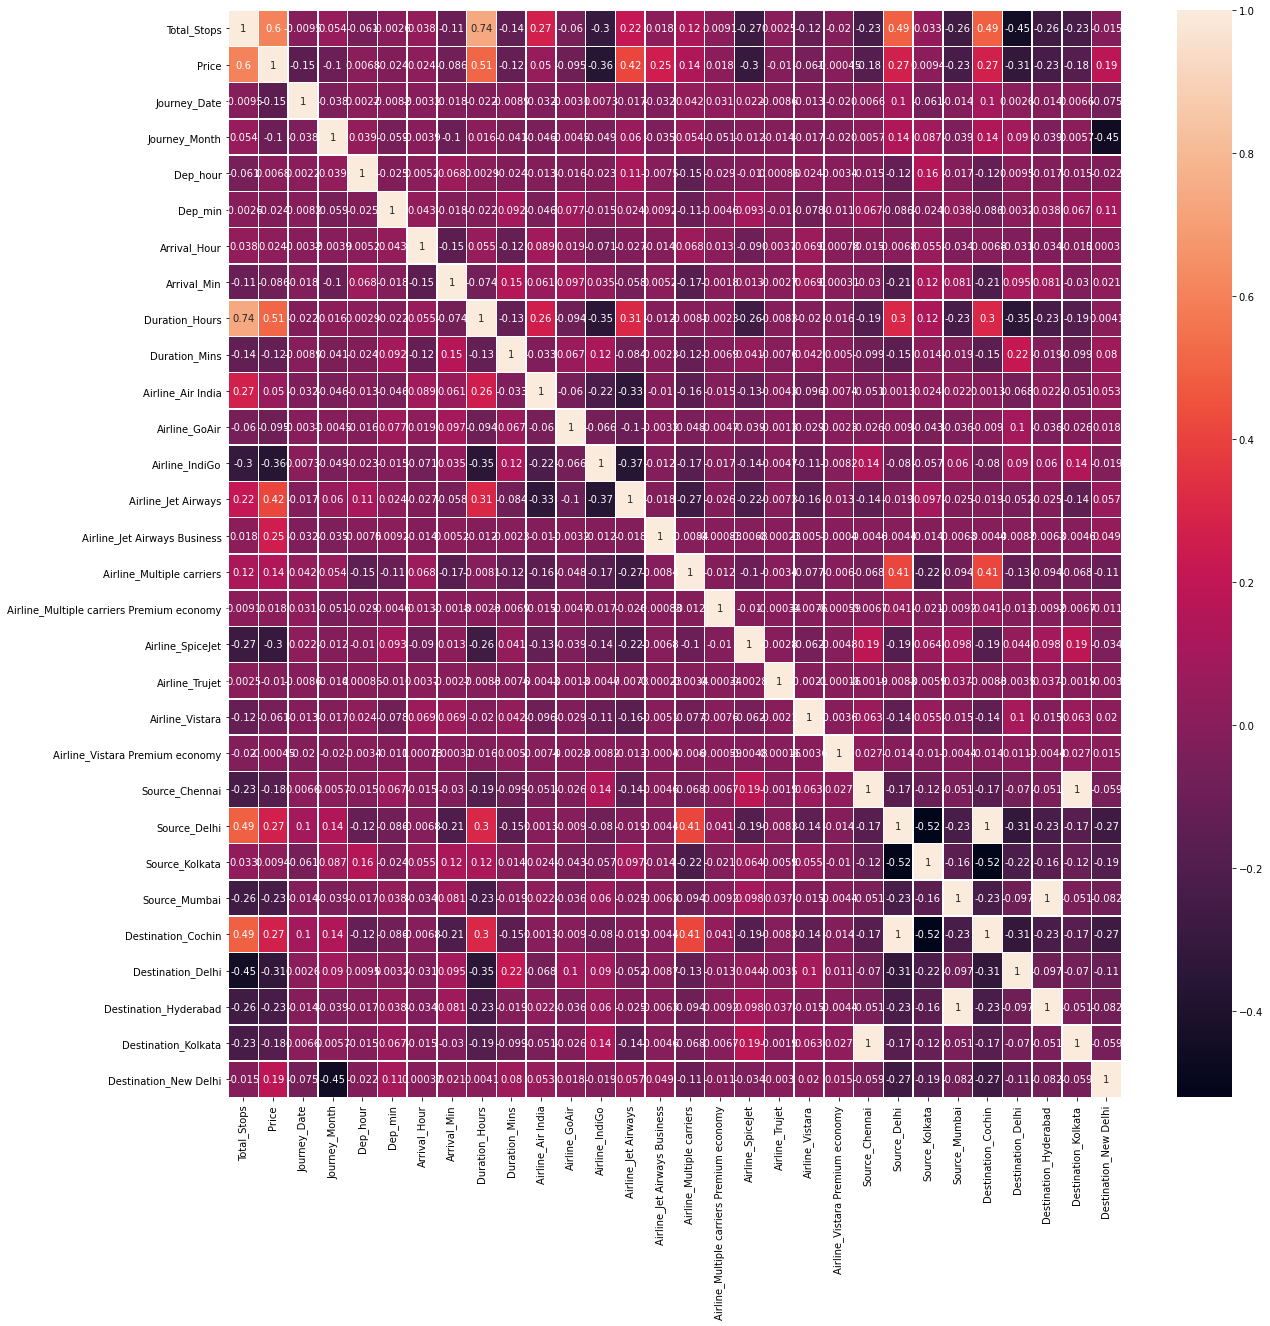

In [143]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(Processed_train_data_set[relation_index].corr(),annot=True,linewidth=0.5)

Any two independent features highly correlated then we can drop one of them because both are doing same job

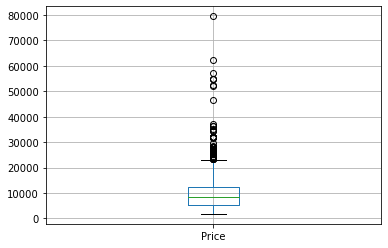

In [144]:
# Outliers 
Processed_train_data_set.boxplot(column='Price')
plt.show()

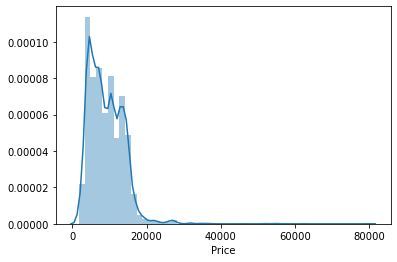

In [145]:
sns.distplot(Processed_train_data_set['Price'])

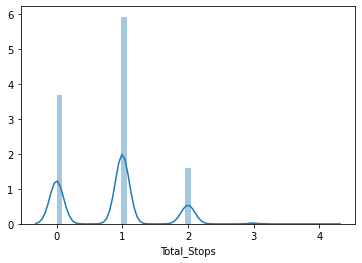

In [146]:
sns.distplot(Processed_train_data_set['Total_Stops'])

We have more 1 halt's 

Upto now we preprocess the train_data_set 

We need do same steps on test_data_set

In [147]:
test_data_set=pd.read_csv('Test.csv')

In [148]:
test_data_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [149]:
test_data_set.shape

(2671, 10)

we don't have Price column in test_data_set

In [150]:
print("Test data Info")
print("-"*75)
print(test_data_set.info())

print()
print()

print("Null values :")
print("-"*75)
test_data_set.dropna(inplace = True)
print(test_data_set.isnull().sum())

# EDA

# Date_of_Journey
test_data_set["Journey_day"] = pd.to_datetime(test_data_set.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data_set["Journey_month"] = pd.to_datetime(test_data_set["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data_set.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data_set["Dep_hour"] = pd.to_datetime(test_data_set["Dep_Time"]).dt.hour
test_data_set["Dep_min"] = pd.to_datetime(test_data_set["Dep_Time"]).dt.minute
test_data_set.drop(["Dep_Time"], axis = 1, inplace = True)


# Arrival_Time
test_data_set["Arrival_hour"] = pd.to_datetime(test_data_set.Arrival_Time).dt.hour
test_data_set["Arrival_min"] = pd.to_datetime(test_data_set.Arrival_Time).dt.minute
test_data_set.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data_set["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data_set["Duration_hours"] = duration_hours
test_data_set["Duration_mins"] = duration_mins
test_data_set.drop(["Duration"], axis = 1, inplace = True)




# Categorical data

print("Airline")
print("-"*75)
print(test_data_set["Airline"].value_counts())
Airline = pd.get_dummies(test_data_set["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data_set["Source"].value_counts())
Source = pd.get_dummies(test_data_set["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data_set["Destination"].value_counts())
Destination = pd.get_dummies(test_data_set["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data_set.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data_set.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
Processed_test_data_set = pd.concat([test_data_set, Airline, Source, Destination], axis = 1)

Processed_test_data_set.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", Processed_test_data_set.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [151]:
Processed_test_data_set.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection

In [152]:
Processed_train_data_set.columns


Index(['Total_Stops', 'Price', 'Journey_Date', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [153]:
# Independent Variables 

X=Processed_train_data_set.loc[:, ['Total_Stops', 'Journey_Date', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [154]:
X.head()

,Total_Stops,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [155]:
# Dependent Variables
y = Processed_train_data_set.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [156]:
# Feature Selection using Lasso


from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [157]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [159]:
model.fit(X_train,y_train)

c:\users\unify\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9625403484.381214, tolerance: 15795030.214114046
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [160]:
model.get_support()


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

From L1 based feature selction model gives us all features are important

In [161]:
# Feature selection using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor



In [162]:
model1= ExtraTreesRegressor()

In [163]:
model1.fit(X_train,y_train)

ExtraTreesRegressor()

In [164]:
model1.feature_importances_

array([2.66787607e-01, 1.41968711e-01, 4.97580041e-02, 2.52053232e-02,
       2.17675435e-02, 2.36268564e-02, 1.88784091e-02, 1.01315140e-01,
       1.77647326e-02, 9.77910226e-03, 1.85050689e-03, 1.95597504e-02,
       1.31163009e-01, 7.62320267e-02, 1.80558480e-02, 8.28009160e-04,
       3.24846035e-03, 2.26863350e-04, 4.35798030e-03, 1.29107771e-04,
       4.94977440e-04, 4.47841744e-03, 3.26922832e-03, 5.94016276e-03,
       7.07918041e-03, 1.34133466e-02, 6.33061286e-03, 5.49745599e-04,
       2.59413369e-02])

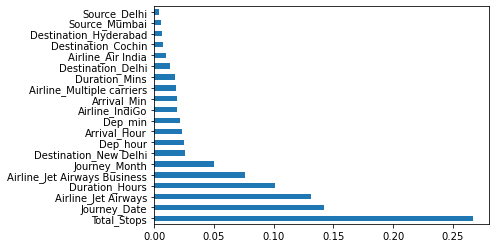

In [165]:
# visualizing Tree based feature selection model  

feat_importances = pd.Series(model1.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Bagging and Boosting algorithms work's well for this type of datasets

## RandomForest Regressor Model

## Model Training

In [166]:
X

,Total_Stops,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,...,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,...,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,0,1


In [167]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [169]:
X_train.shape,y_train.shape

((8545, 29), (8545,))

In [170]:
X_test.shape,y_test.shape

((2137, 29), (2137,))

In [171]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
# intializing the randomeforest regressor

random_forest_reg=RandomForestRegressor()

In [173]:
# fit the X_train and y_train values to the model
random_forest_reg.fit(X_train,y_train)

RandomForestRegressor()

In [174]:
# training data set score
random_forest_reg.score(X_train,y_train)

0.9553050350216248

In [175]:
# test data set score
random_forest_reg.score(X_test,y_test)

0.8082502792194256

In [176]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(random_forest_reg, X, y, cv=5)

In [177]:
score.mean()

0.8125831956023738

## Model Evaluation

In [178]:
y_pred=random_forest_reg.predict(X_test)

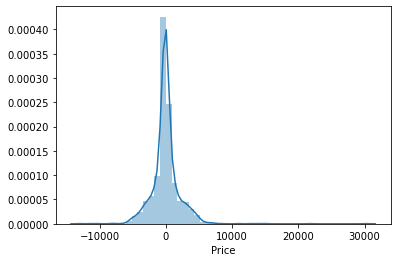

In [179]:
sns.distplot(y_test-y_pred)

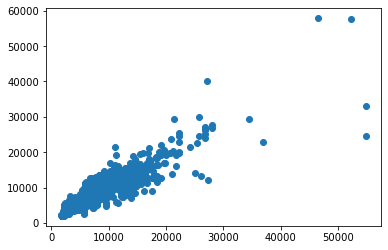

In [180]:
plt.scatter(y_test,y_pred)

In [181]:
import pickle
# open a file, where you want to store the data
file = open('regressor2.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest_reg, file)

In [182]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 4499057.248825653


# Hyperparameter Optimization

In [83]:
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [84]:
# Hyparameter ranges 

from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'max_features': ['auto','sqrt'],
               'max_depth': randint(5,40),
               'min_samples_split': randint(2,30),
               'min_samples_leaf': randint(1,10)  }


In [85]:
# Model for tuning

base_learner=RandomForestRegressor()


In [86]:
# Tuning 

tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [87]:
tuned_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 21.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000184BBC1B2B0>,
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000184BBC01DD8>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000184BBC1B7B8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000184BBC1B4E0>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [88]:
tuned_model.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 518}

In [89]:
tuned_model.best_score_

-3594080.248752372

In [90]:
# Predicting X_test values using tuned_model
prediction=tuned_model.predict(X_test)

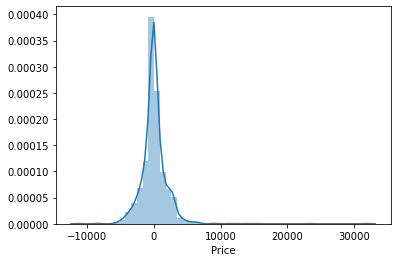

In [91]:
sns.distplot(y_test-prediction)

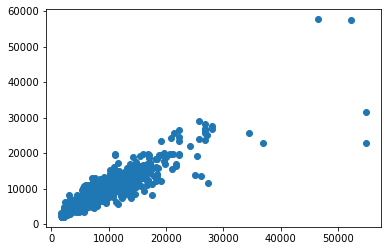

In [92]:
# checking difference between labled y and predicted y
plt.scatter(y_test,prediction)

In [93]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1189.3943269099216
MSE: 3924314.153175539
RMSE: 1980.98817593027


In [94]:
import pickle
# open a file, where you want to store the data
file = open('regressor.pkl', 'wb')

# dump information to that file
pickle.dump(tuned_model, file)


In [95]:
scaled_model=RandomForestRegressor(max_depth=15,max_features='auto',min_samples_leaf=1,min_samples_split= 9,n_estimators= 518)

In [96]:
scaled_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_split=9, n_estimators=518)

In [97]:
scaled_model.score(X_train,y_train)

0.9158518836339542

In [98]:
scaled_model.score(X_test,y_test)

0.8337822592537428

In [101]:
# cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(scaled_model, X, y, cv=5)

In [102]:
score.mean()

0.8325441118359246

In [103]:
import pickle
# open a file, where you want to store the data
file = open('regressor1.pkl', 'wb')

# dump information to that file
pickle.dump(scaled_model, file)

## Xgboost Regressor 

In [79]:
X=Processed_train_data_set.loc[:, ['Total_Stops', 'Journey_Date', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [82]:
X.shape

(10682, 29)

In [81]:
y = Processed_train_data_set.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [88]:
y_train

7104    11281
6507    13859
4861    10919
8005     4860
155     10697
        ...  
9226     4483
4859    10651
3264    17024
9846    11966
2732    13067
Name: Price, Length: 7477, dtype: int64

In [85]:
X_test

,Total_Stops,Journey_Date,Journey_Month,Dep_hour,Dep_min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10507,1,15,5,14,5,22,35,8,30,0,...,0,0,0,1,0,0,0,0,0,0
7705,1,21,5,7,15,12,30,5,15,0,...,0,0,1,0,0,1,0,0,0,0
7700,0,27,6,17,45,20,5,2,20,0,...,0,1,0,0,0,0,0,0,1,0
1437,1,6,3,9,45,14,25,4,40,0,...,0,0,0,0,0,0,0,0,0,1
8884,0,1,5,17,15,19,50,2,35,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,1,21,5,8,30,21,0,12,30,0,...,0,0,1,0,0,1,0,0,0,0
9484,3,21,3,5,15,19,15,38,0,1,...,0,0,1,0,0,1,0,0,0,0
7706,1,9,4,15,15,20,5,4,50,0,...,0,0,0,1,0,0,0,0,0,0
872,1,18,5,21,10,10,5,12,55,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
import xgboost as xgb

In [87]:
xg_reg=xgb.XGBRegressor()

In [89]:
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
xg_reg.score(X_train,y_train)

0.9376236869780772

In [91]:
xg_reg.score(X_test,y_test)

0.8295637852765559

In [92]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xg_reg,X,y,cv=5)

In [93]:
score.mean()

0.8482358648057502

In [94]:
y_pred=xg_reg.predict(X_test)

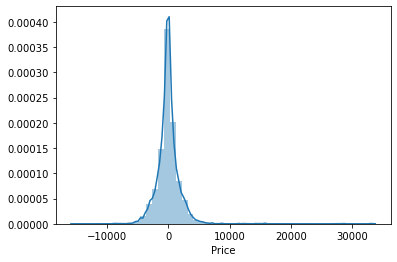

In [95]:
sns.distplot(y_test-y_pred)

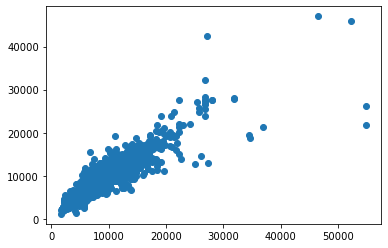

In [96]:
plt.scatter(y_test,y_pred)

In [97]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1175.1126256505338
MSE: 3679712.0780790676
RMSE: 1918.257563018863


## Hyperparameter Optimization

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'learning_rate': [0.001,0.002,0.003,0.005,0.01,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6],
               'max_depth': randint(5,40),
               'subsample': [0.5,0.6,0.7,0.8],
               'min_child_weight': randint(1,10)  }

In [100]:
base_model=xgb.XGBRegressor()

In [101]:
# Tuning 

scaled_model= RandomizedSearchCV(estimator = base_model, param_distributions = parameters,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [102]:
scaled_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 51.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 78.5min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000227473ADBA8>,
                                        'min_child_weight': <

In [103]:
scaled_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 9,
 'n_estimators': 572,
 'subsample': 0.6}

In [105]:
scaled_model.best_score_

-3696626.8644754244

In [106]:
# Predicting X_test values using tuned_model
y_pred=scaled_model.predict(X_test)

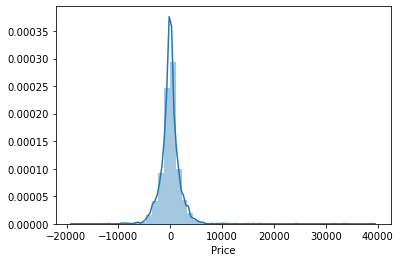

In [107]:
sns.distplot(y_test-y_pred)

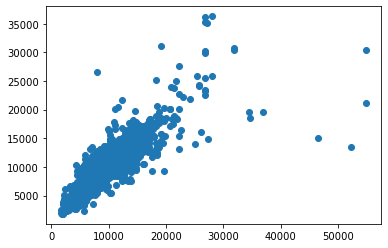

In [108]:
plt.scatter(y_test,y_pred)

In [109]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1259.7621667347162
MSE: 4770811.169905808
RMSE: 2184.218663482621


In [110]:
final=xgb.XGBRegressor(learning_rate= 0.1,max_depth= 5,min_child_weight= 9,n_estimators= 572,subsample= 0.6)

In [111]:
final.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=9, missing=nan, monotone_constraints='()',
             n_estimators=572, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
final.score(X_train,y_train)

0.9267213959088354

In [113]:
final.score(X_test,y_test)

0.7790264619335253

In [114]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(final,X,y,cv=5)

In [115]:
score.mean()

0.8196377452170669

In [116]:
y_pred=final.predict(X_test)

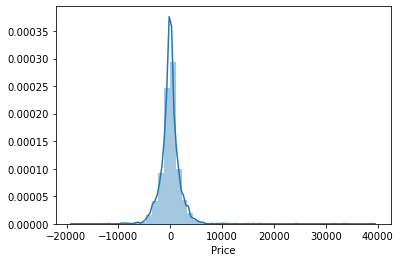

In [117]:
sns.distplot(y_test-y_pred)

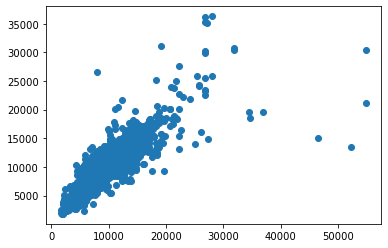

In [118]:
plt.scatter(y_test,y_pred)

In [119]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1259.7621667347162
MSE: 4770811.169905808
RMSE: 2184.218663482621


In [120]:

import pickle
# open a file, where you ant to store the data
file = open('flight_xgb.pkl', 'wb')

# dump information to that file
pickle.dump(xg_reg, file)

In [121]:

model = open('flight_xgb.pkl','rb')
forest = pickle.load(model)

In [122]:
y_prediction = forest.predict(X_test)

In [123]:
metrics.r2_score(y_test,y_prediction)

0.8295637852765559

In [124]:
import pickle
# open a file, where you want to store the data
file = open('flight_xgb_2.pkl', 'wb')

# dump information to that file
pickle.dump(final, file)

In [125]:

model1 = open('flight_xgb_2.pkl','rb')
forest1 = pickle.load(model1)

In [127]:
y_prediction = forest1.predict(X_test)

In [128]:
metrics.r2_score(y_test,y_prediction)

0.7790264619335253

In [130]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import StackingRegressor

In [131]:
 estimators = [('xgb', xgb.XGBRegressor()), ('rf',RandomForestRegressor(random_state=42))]

In [132]:
reg = StackingRegressor(estimators=estimators,final_estimator=xgb.XGBRegressor())

In [133]:
reg.fit(X_train,y_train)

StackingRegressor(estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=10...
                                               importance_type='gain',
                                               interaction_constraints=None,
           

In [134]:
reg.score(X_train,y_train)

0.8941597778402028

In [135]:
reg.score(X_test,y_test)

0.8015994521793914

In [136]:
y_pred=reg.predict(X_test)

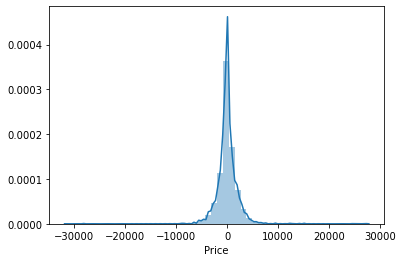

In [137]:
sns.distplot(y_test-y_pred)

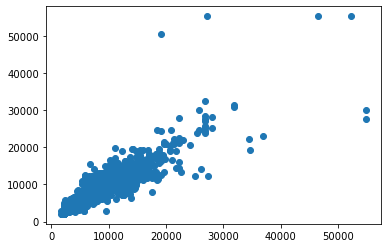

In [138]:
plt.scatter(y_test,y_pred)

In [139]:
import pickle
# open a file, where you want to store the data
file = open('flight_stacking.pkl', 'wb')

# dump information to that file
pickle.dump(reg, file)

In [140]:
model2 = open('flight_stacking.pkl','rb')
forest2 = pickle.load(model2)

In [141]:
y_prediction = forest2.predict(X_test)

In [142]:
metrics.r2_score(y_test,y_prediction)

0.8015994521793914

In [143]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))


MSE: 4283461.078372419
